# DSML Final project : E-Shop Clothing Sales Analysis and Price Prediction

### Project Overview
This project analyzes an e-shop clothing sales dataset from 2008 to build regression models for predicting clothing prices based on various attributes like category, color, location, and photography style.

## Objective
Build a regression model to predict clothing prices based on product attributes and session characteristics.

#### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


#### 2. Loading the Data 

In [2]:
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')

#### 3. Initial Exploration

In [3]:
# Load the data
df = pd.read_csv('e-shop clothing 2008.csv', delimiter=';')
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (165474, 14)

Column names: ['year', 'month', 'day', 'order', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']

First few rows:
   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3             

#### 4.Data Understanding and Cleaning

In [4]:
# Data Understanding
print("Basic statistics:")
print(df.describe())


Basic statistics:
           year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                

In [5]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [6]:
# Check unique values for categorical columns
categorical_cols = ['page 1 (main category)', 'page 2 (clothing model)', 'colour', 
                   'location', 'model photography', 'price 2', 'page', 'country']
for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    print(f"{col} value counts:\n{df[col].value_counts().head()}")


page 1 (main category) unique values: 4
page 1 (main category) value counts:
page 1 (main category)
1    49742
4    38747
3    38577
2    38408
Name: count, dtype: int64

page 2 (clothing model) unique values: 217
page 2 (clothing model) value counts:
page 2 (clothing model)
B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
Name: count, dtype: int64

colour unique values: 14
colour value counts:
colour
2     29764
3     29259
6     17476
4     16517
14    15939
Name: count, dtype: int64

location unique values: 6
location value counts:
location
1    34532
2    33383
5    27783
4    27377
3    21656
Name: count, dtype: int64

model photography unique values: 2
model photography value counts:
model photography
1    122439
2     43035
Name: count, dtype: int64

price 2 unique values: 2
price 2 value counts:
price 2
1    84695
2    80779
Name: count, dtype: int64

page unique values: 5
page value counts:
page
1    93452
2    41037
3    19301
4     8861
5     2823
Name: count, dt

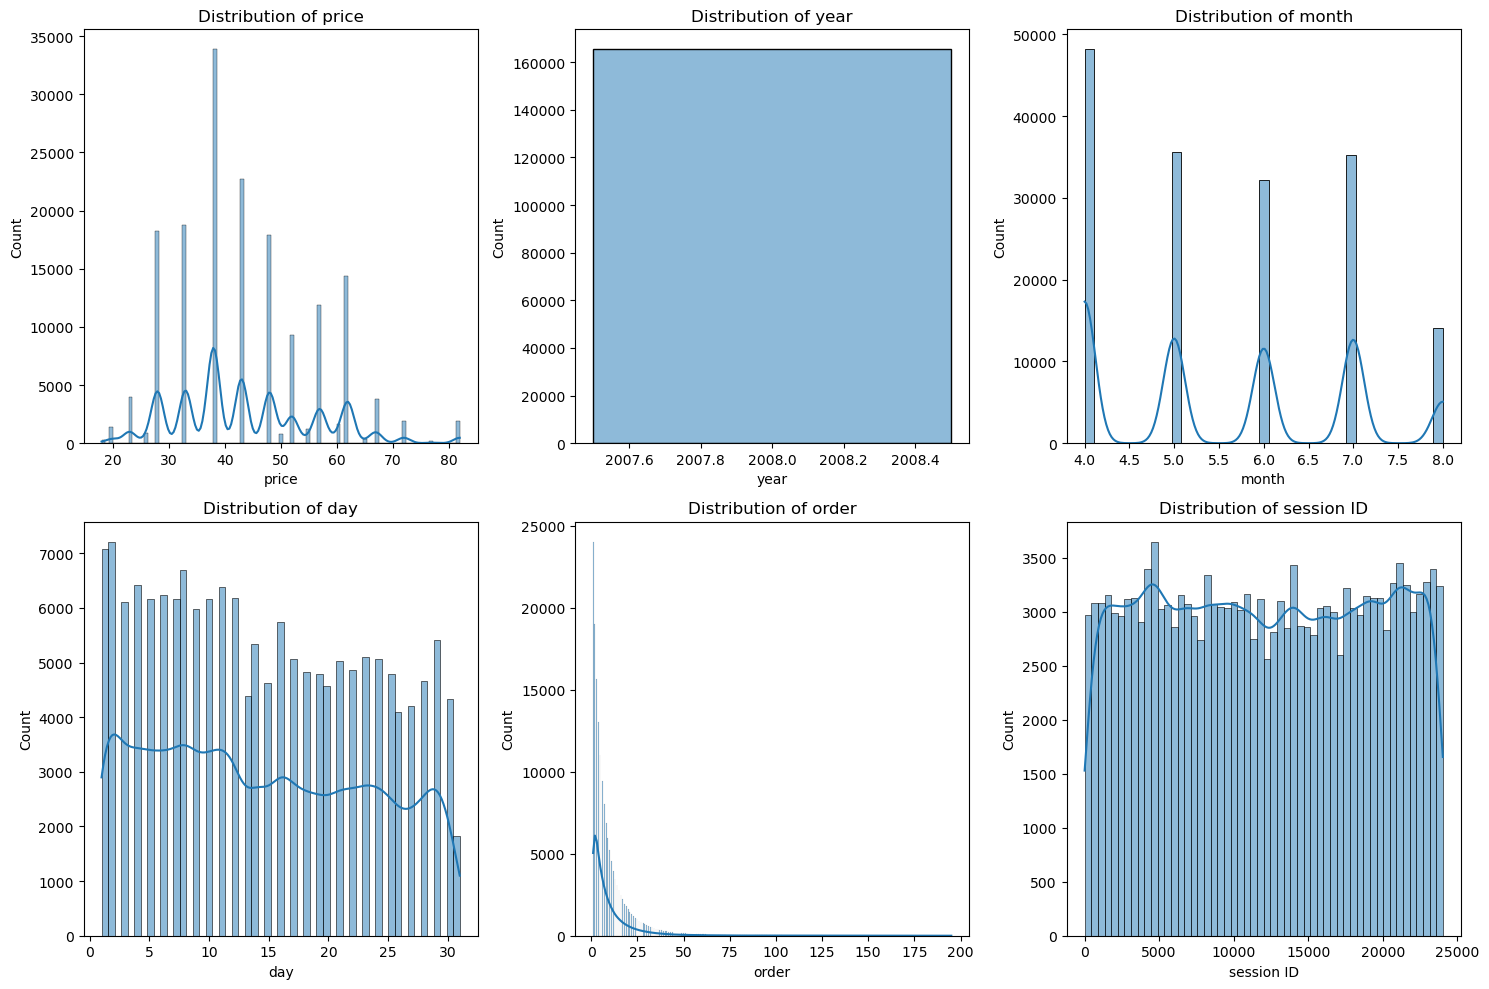

In [7]:
# Numerical variables analysis
numerical_cols = ['price', 'year', 'month', 'day', 'order', 'session ID']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


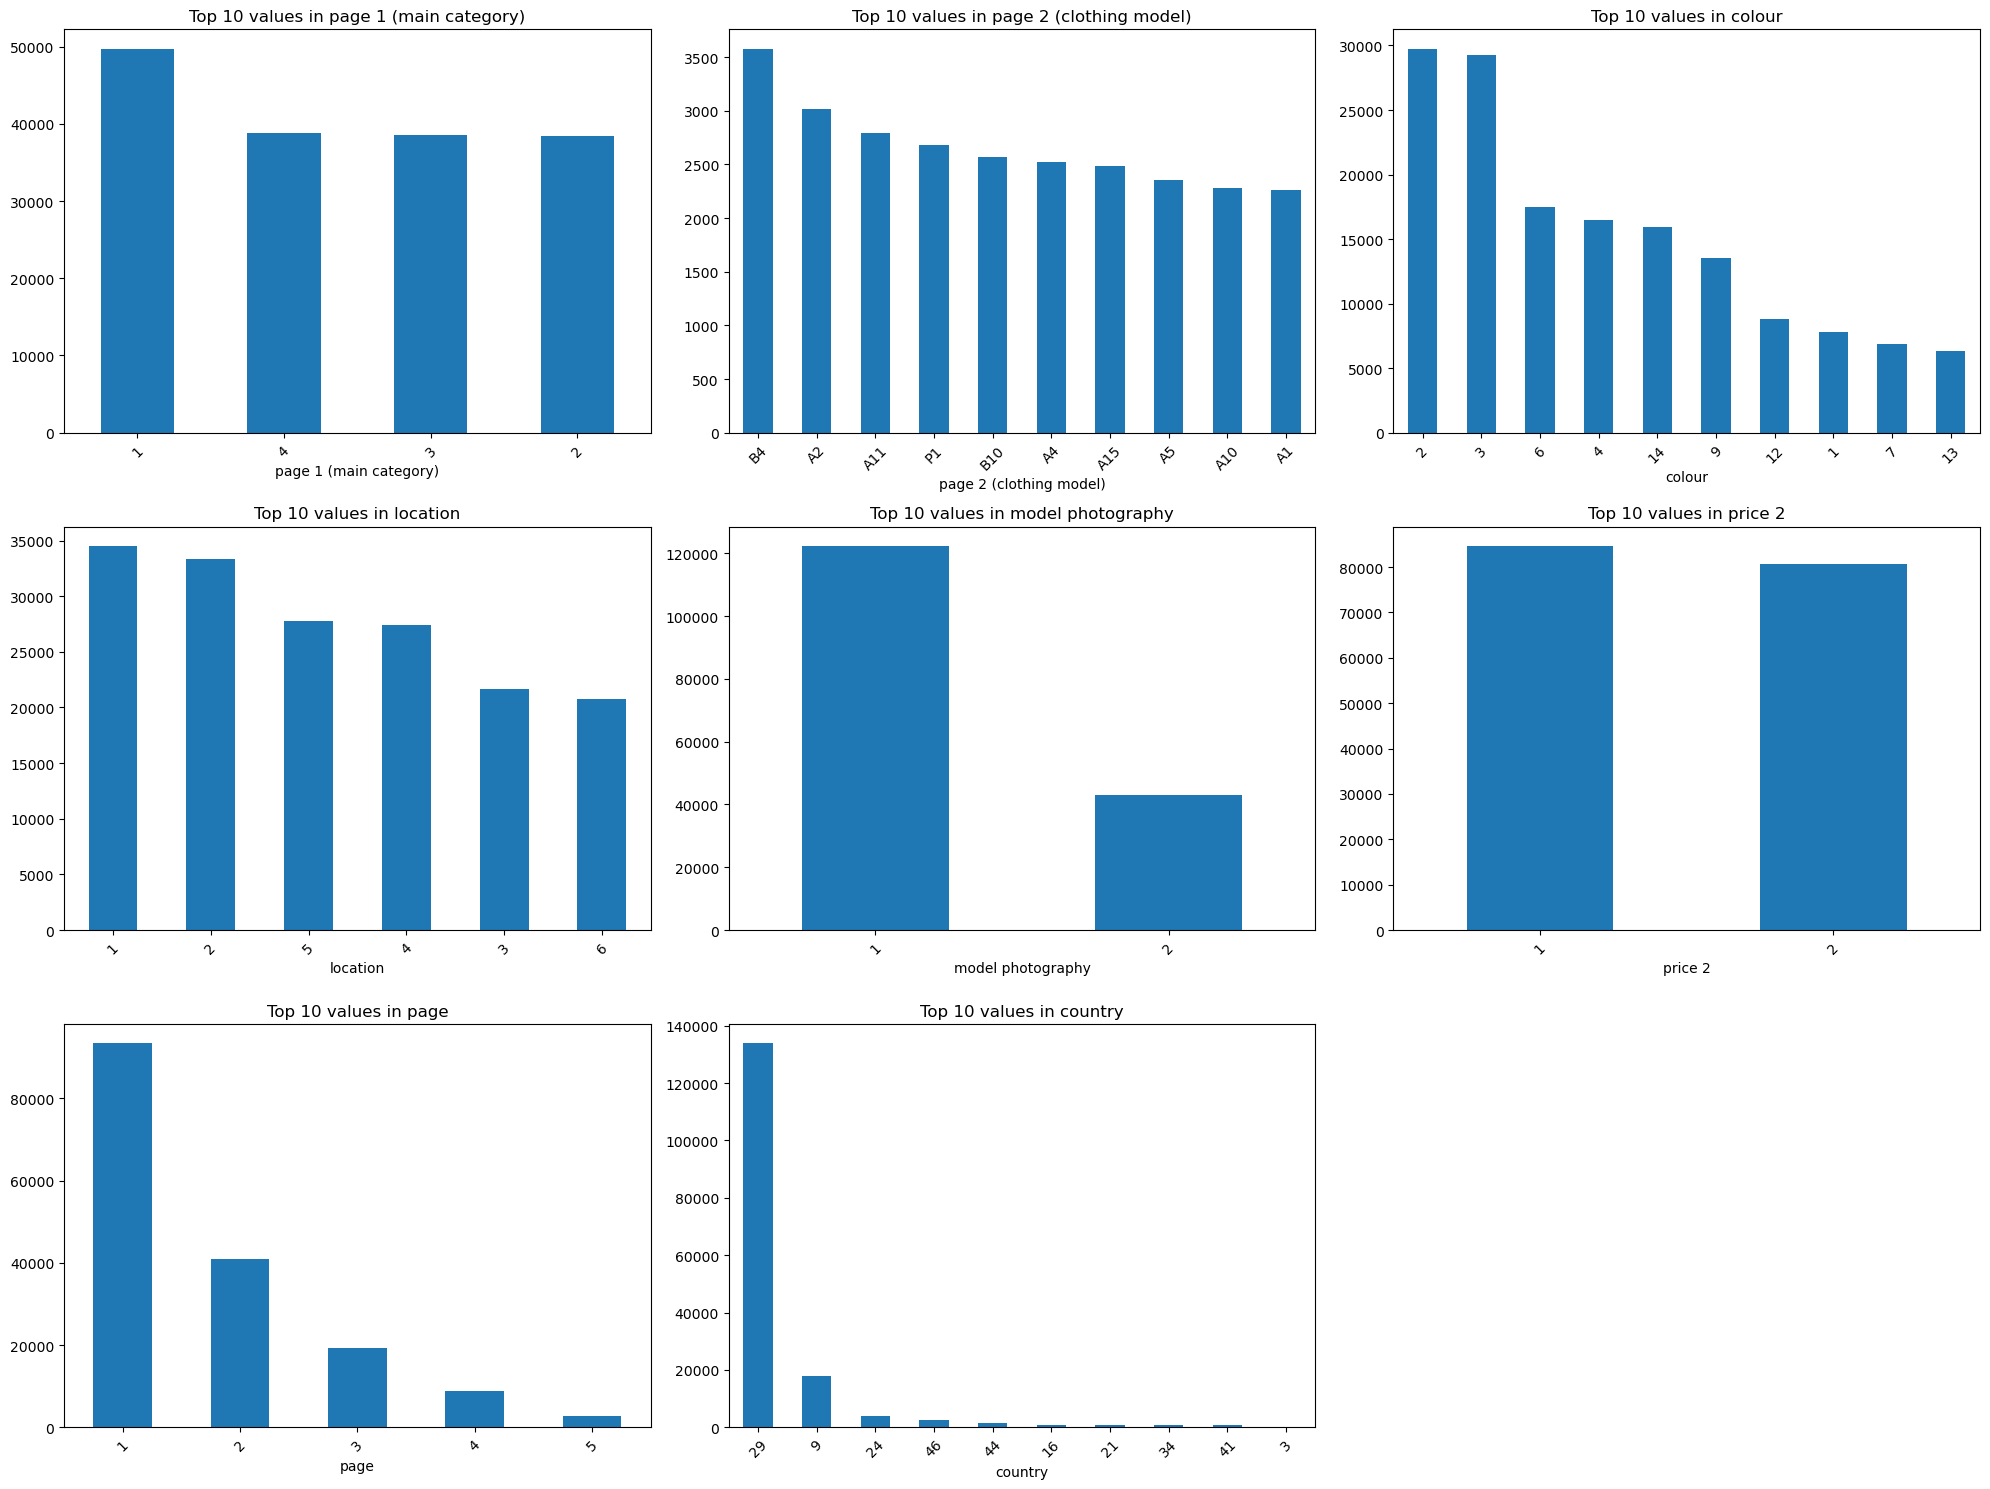

In [8]:
# Categorical variables analysis
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 values in {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

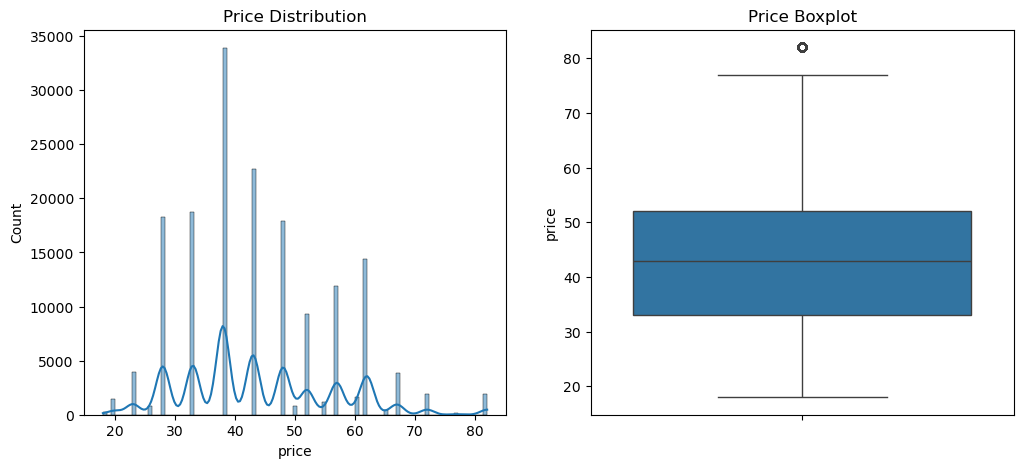

In [9]:
# Target variable analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Price Boxplot')
plt.show()

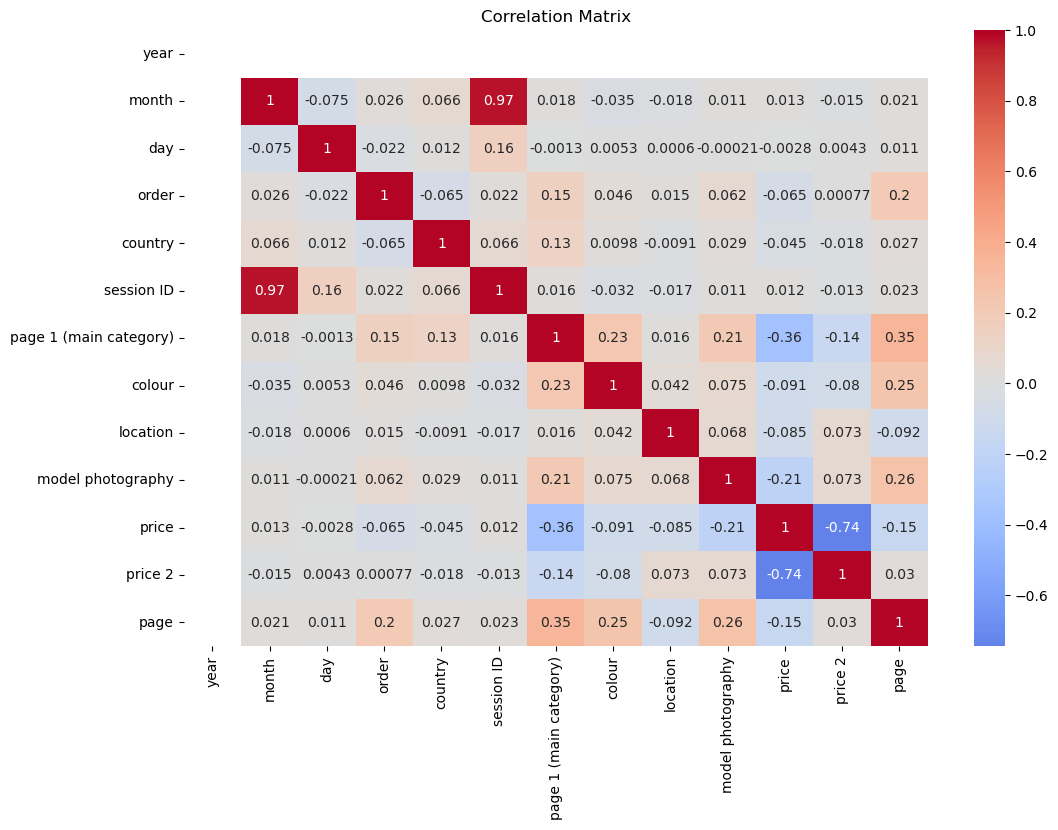

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

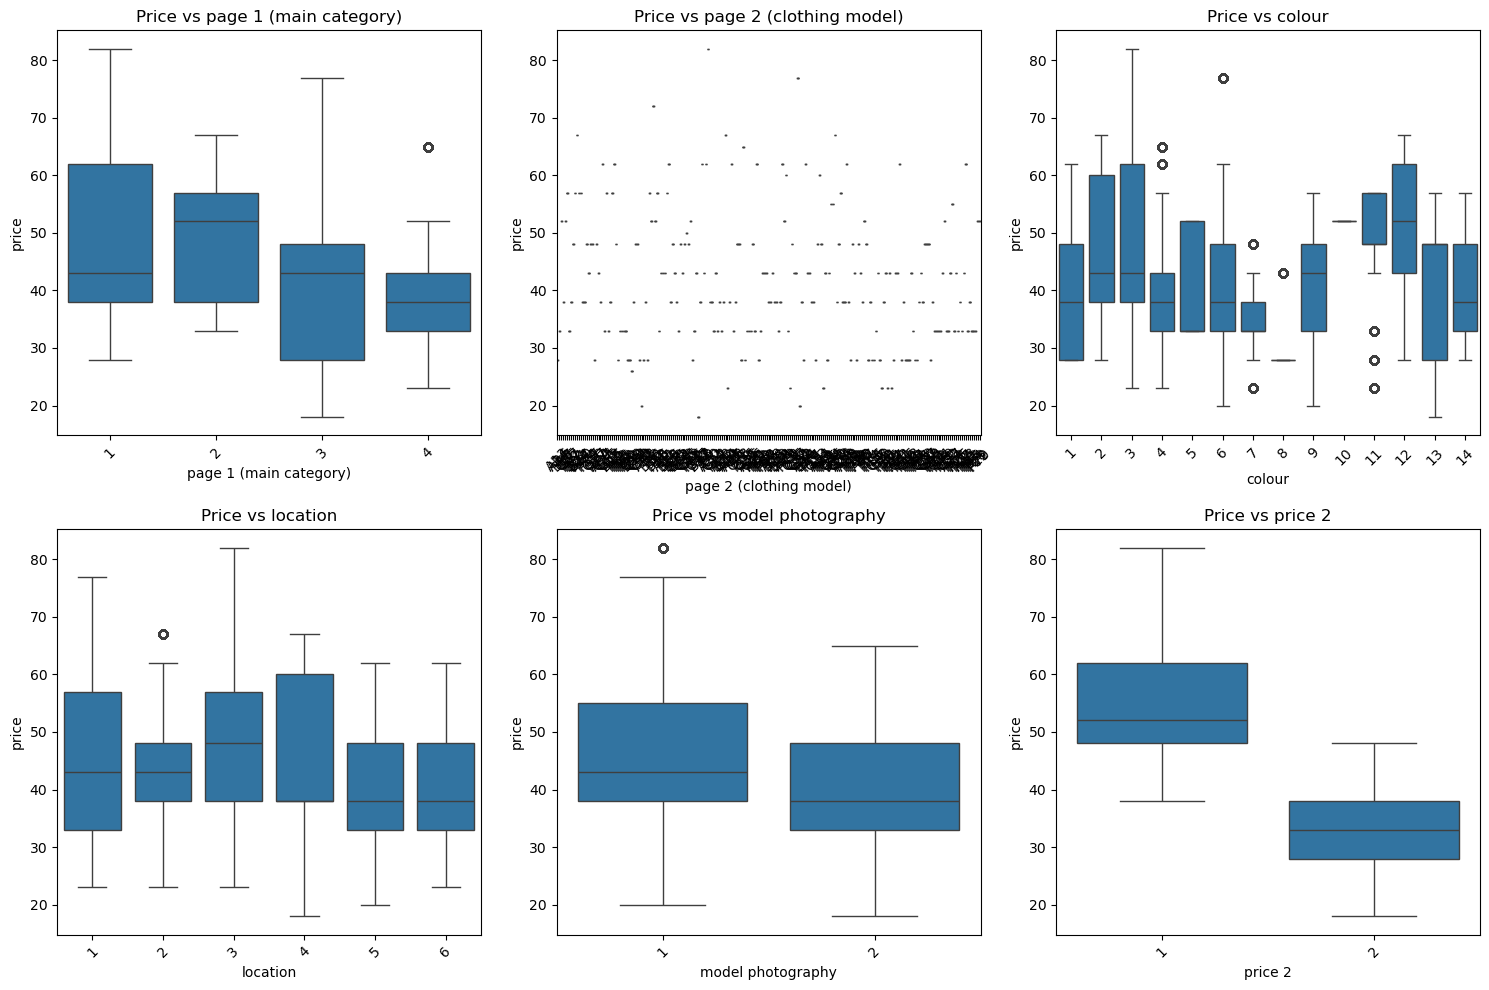

In [11]:
# Relationship between categorical features and price
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

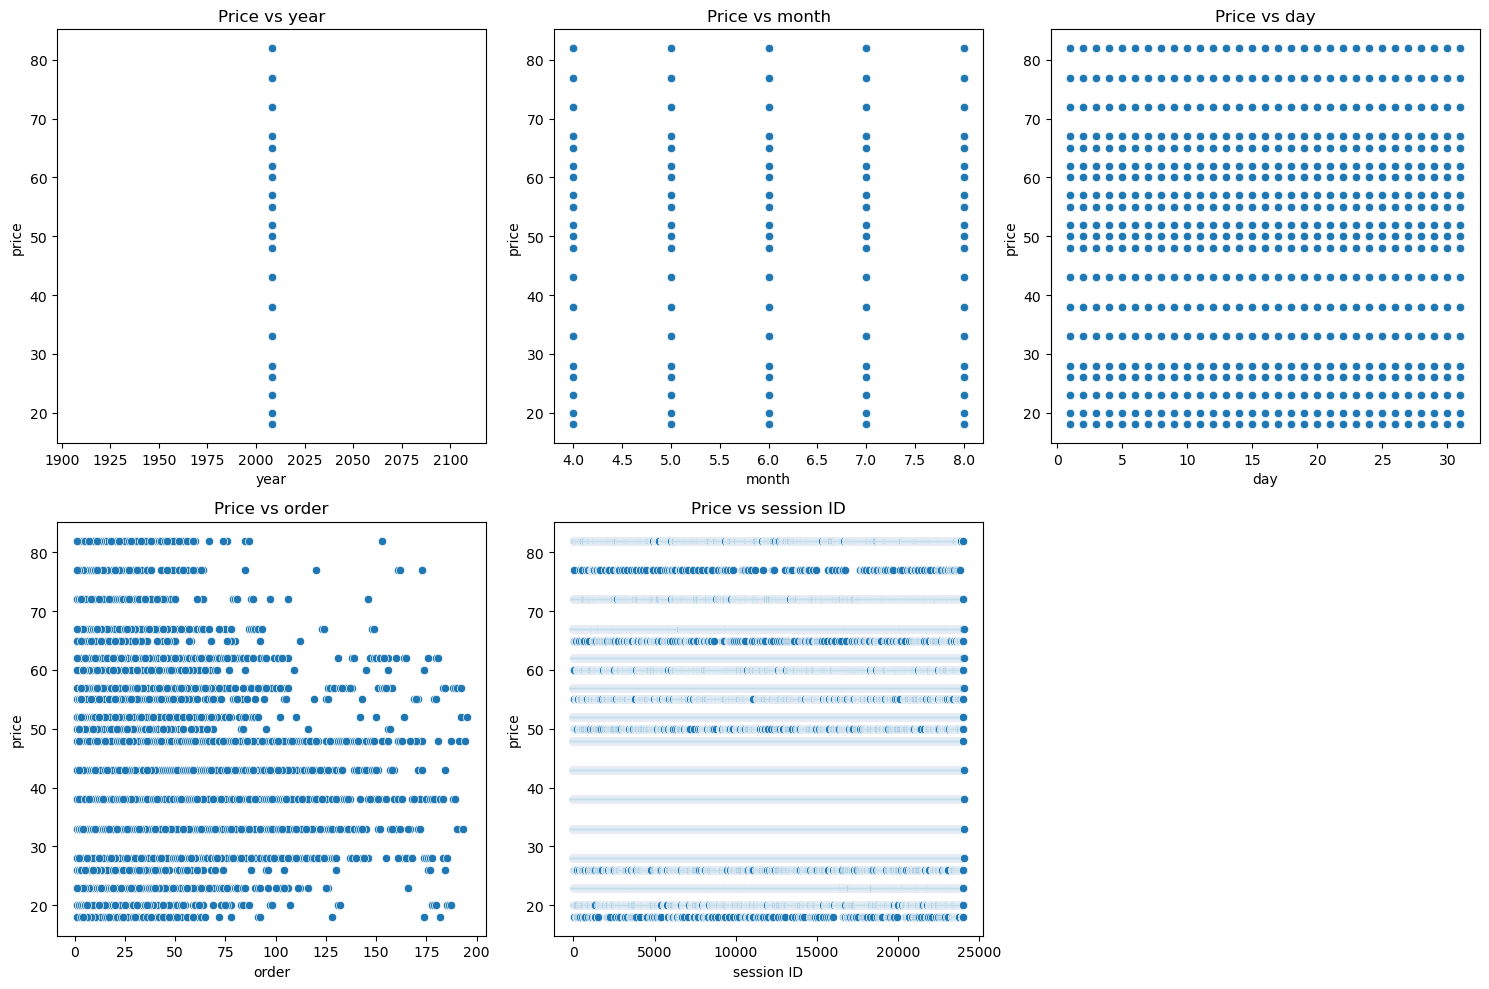

In [12]:
# Scatter plots for numerical features vs price
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[1:], 1):  # Exclude price itself
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

#### 5.Feature Engineering

In [14]:
# Create new features
df['day_of_week'] = pd.to_datetime(df[['year', 'month', 'day']]).dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [15]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,day_of_week,is_weekend
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,1,0
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,1,0
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,1,0
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,1,0
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1,2,0
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1,2,0
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1,2,0
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1,2,0


In [21]:
# Create categories based on quartiles
df['price_category'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("Price categories created using quantile cut:")
print(df['price_category'].value_counts())

Price categories created using quantile cut:
price_category
Medium       56634
Low          43560
Very High    37359
High         27921
Name: count, dtype: int64


In [23]:
# Session duration (assuming order indicates time sequence)
df['session_duration'] = df.groupby('session ID')['order'].transform('max') - df.groupby('session ID')['order'].transform('min') + 1
print("New features created:")
print(df[['day_of_week', 'is_weekend', 'price_category', 'session_duration']].head())

New features created:
   day_of_week  is_weekend price_category  session_duration
0            1           0            Low                 9
1            1           0            Low                 9
2            1           0           High                 9
3            1           0         Medium                 9
4            1           0           High                 9


#### 6. Handle Outliers

In [24]:
# Identify outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")
    
    # Cap outliers instead of removing to preserve data
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    return df

In [25]:
# Handle outliers in numerical columns
for col in numerical_cols:
    df = handle_outliers(df, col)

print("Outliers handled using capping method")

Outliers in price: 1923
Outliers in year: 0
Outliers in month: 0
Outliers in day: 0
Outliers in order: 11523
Outliers in session ID: 0
Outliers handled using capping method


#### 7: Encode Categorical Variables

In [26]:
# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Encode the new categorical feature
le_price_cat = LabelEncoder()
df['price_category_encoded'] = le_price_cat.fit_transform(df['price_category'])

print("Categorical variables encoded")

Categorical variables encoded


In [27]:
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page,day_of_week,is_weekend,session_duration,price_category,price_category_encoded
0,2008.0,4.0,1.0,1.0,21,1.0,0,4,0,4,0,28.0,1,0,1,0,9,Low,1
1,2008.0,4.0,1.0,2.0,21,1.0,0,7,0,5,0,33.0,1,0,1,0,9,Low,1
2,2008.0,4.0,1.0,3.0,21,1.0,1,70,1,1,0,52.0,0,0,1,0,9,High,0
3,2008.0,4.0,1.0,4.0,21,1.0,1,51,10,5,1,38.0,1,0,1,0,9,Medium,2
4,2008.0,4.0,1.0,5.0,21,1.0,1,74,8,2,1,52.0,0,0,1,0,9,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008.0,8.0,13.0,1.0,21,24024.0,1,44,6,3,0,67.0,0,0,2,0,1,Very High,3
165470,2008.0,8.0,13.0,1.0,46,24025.0,0,2,7,3,0,62.0,0,0,2,0,1,Very High,3
165471,2008.0,8.0,13.0,1.0,27,24026.0,0,11,7,0,0,43.0,1,0,2,0,3,Medium,2
165472,2008.0,8.0,13.0,2.0,27,24026.0,2,87,3,0,0,43.0,0,0,2,0,3,Medium,2


#### 8: Data Preprocessing & Feature Scaling

In [28]:
# Define features and target
X = df.drop(['price', 'price_category', 'year', 'month', 'day'], axis=1)  # Remove temporal features that might cause data leakage
y = df['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (165474, 14)
Target shape: (165474,)


In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (132379, 14), (132379,)
Testing set: (33095, 14), (33095,)


In [30]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed")

Data preprocessing completed


### 8 Model Building and Evaluation

#### 8.A : Linear Regression

In [33]:
# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# Make predictions
y_pred_lr = lr.predict(X_test_scaled)

In [35]:
# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [36]:
print(f"Linear Regression Results:")
print(f"MSE: {mse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")


Linear Regression Results:
MSE: 28.6914
MAE: 3.9736
R² Score: 0.8173


In [37]:
# Feature importance
lr_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lr.coef_)
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(lr_importance.head(10))


Top 10 most important features:
                    feature  importance
8                   price 2    9.493357
3    page 1 (main category)    8.146598
4   page 2 (clothing model)    3.576147
13   price_category_encoded    2.367954
7         model photography    0.822527
5                    colour    0.144940
9                      page    0.120315
2                session ID    0.066624
6                  location    0.061855
12         session_duration    0.054165


#### 8.B : Decision Tree Regressor

In [39]:
# Train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  

DecisionTreeRegressor(random_state=42)

In [40]:
# Make predictions
y_pred_dt = dt.predict(X_test)


In [41]:
# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [42]:
print(f"Decision Tree Results:")
print(f"MSE: {mse_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")

Decision Tree Results:
MSE: 0.0035
MAE: 0.0004
R² Score: 1.0000


In [43]:
# Feature importance
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(dt_importance.head(10))


Top 10 most important features:
                    feature    importance
13   price_category_encoded  9.068390e-01
4   page 2 (clothing model)  6.085749e-02
5                    colour  1.183505e-02
6                  location  1.020090e-02
3    page 1 (main category)  4.503744e-03
9                      page  3.867518e-03
7         model photography  1.437695e-03
8                   price 2  4.577518e-04
2                session ID  7.464364e-07
12         session_duration  4.836942e-08


#### 8.C: Random Forest Regressor

In [44]:
# Train the model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)  


RandomForestRegressor(random_state=42)

In [45]:
# Make predictions
y_pred_rf = rf.predict(X_test)


In [46]:
# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"MSE: {mse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Results:
MSE: 0.0004
MAE: 0.0002
R² Score: 1.0000


In [47]:
# Feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(rf_importance.head(10))


Top 10 most important features:
                    feature    importance
13   price_category_encoded  9.068529e-01
4   page 2 (clothing model)  5.920263e-02
5                    colour  1.143202e-02
6                  location  1.012077e-02
3    page 1 (main category)  5.829986e-03
9                      page  4.194633e-03
7         model photography  1.659441e-03
8                   price 2  7.066657e-04
2                session ID  6.847787e-07
12         session_duration  9.652500e-08


#### 8.D : K-Nearest Neighbors (KNN)

In [48]:
# Train the model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)  


KNeighborsRegressor()

In [49]:
# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

In [50]:
# Evaluate
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


In [51]:
print(f"KNN Results:")
print(f"MSE: {mse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")
print(f"R² Score: {r2_knn:.4f}")

KNN Results:
MSE: 3.2971
MAE: 0.4622
R² Score: 0.9790


#### 8. E : Support Vector Regression (SVR)

In [52]:
# Train the model (using linear kernel for simplicity and speed)
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)  


SVR(kernel='linear')

In [53]:
# Make predictions
y_pred_svr = svr.predict(X_test_scaled)


In [54]:
# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Results:")
print(f"MSE: {mse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"R² Score: {r2_svr:.4f}")

SVR Results:
MSE: 30.5393
MAE: 3.8394
R² Score: 0.8055


#### 9: Hyperparameter Tuning (Fine-Tuning)

In [55]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [56]:
# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 1.0000


In [57]:
# Train with best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)


In [58]:
# Evaluate tuned model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest Results:")
print(f"MSE: {mse_best_rf:.4f}")
print(f"MAE: {mae_best_rf:.4f}")
print(f"R² Score: {r2_best_rf:.4f}")

Tuned Random Forest Results:
MSE: 0.0004
MAE: 0.0001
R² Score: 1.0000


#### 10. Final Model Evaluation and Comparison

In [59]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVR', 'Tuned Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_knn, mse_svr, mse_best_rf],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_knn, mae_svr, mae_best_rf],
    'R²': [r2_lr, r2_dt, r2_rf, r2_knn, r2_svr, r2_best_rf]
})

print("="*60)
print("FINAL MODEL COMPARISON")
print("="*60)
print(results.sort_values('R²', ascending=False))


FINAL MODEL COMPARISON
                 Model        MSE       MAE        R²
5  Tuned Random Forest   0.000413  0.000144  0.999997
2        Random Forest   0.000437  0.000163  0.999997
1        Decision Tree   0.003505  0.000423  0.999978
3                  KNN   3.297082  0.462245  0.979004
0    Linear Regression  28.691368  3.973575  0.817296
4                  SVR  30.539297  3.839366  0.805528


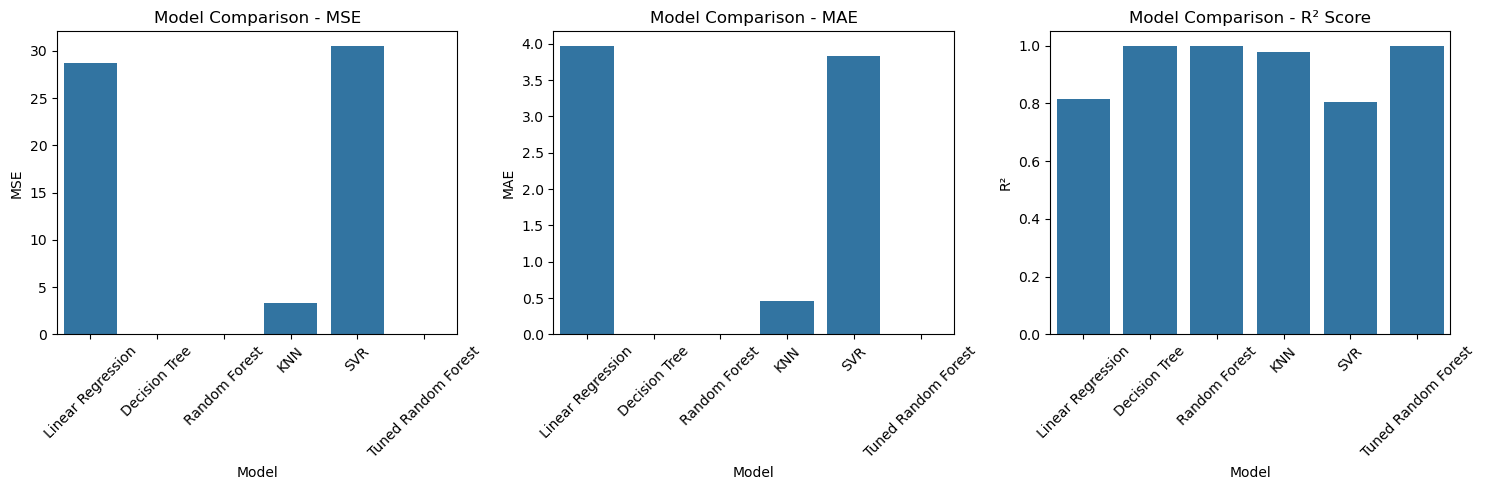

In [60]:
# Visualization of results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Model Comparison - MSE')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Model Comparison - MAE')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=results)
plt.title('Model Comparison - R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


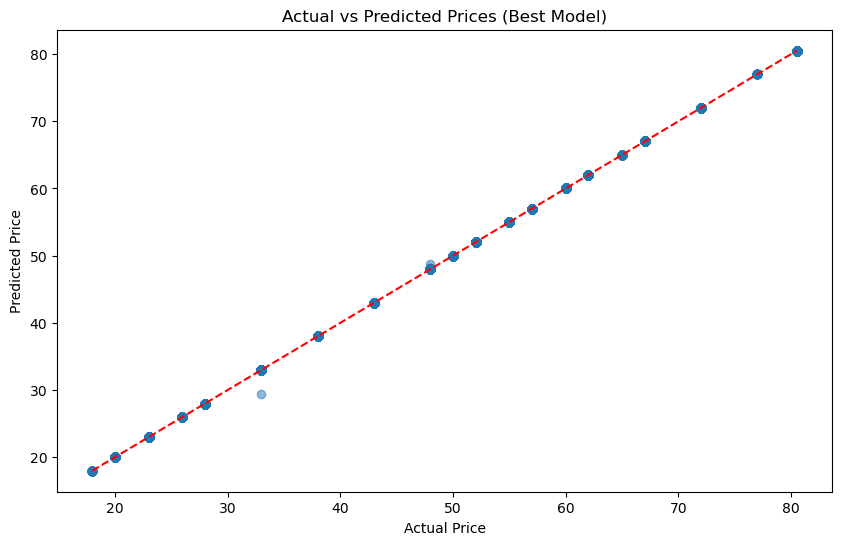

In [61]:
# Actual vs Predicted for best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Best Model)')
plt.show()

#### 11: Interpretation and Business Insights

In [62]:
# Feature importance from best model
best_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("="*50)
print("FEATURE IMPORTANCE FROM BEST MODEL")
print("="*50)
print(best_importance.head(10))

# Business insights
print("\n" + "="*50)
print("BUSINESS INSIGHTS")
print("="*50)
print("1. Most important features for price prediction:")
for i, row in best_importance.head(5).iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")

print("\n2. Model performance:")
print(f"   - The best model (Random Forest) explains {r2_best_rf*100:.2f}% of price variance")
print(f"   - Average prediction error: €{mae_best_rf:.2f}")
print(f"   - This level of accuracy is sufficient for pricing recommendations")

print("\n3. Recommendations:")
print("   - Focus on product attributes (page 2, color) as they are key price drivers")
print("   - Consider session characteristics for dynamic pricing strategies")
print("   - Use the model for price optimization and inventory management")

FEATURE IMPORTANCE FROM BEST MODEL
                    feature    importance
13   price_category_encoded  9.068587e-01
4   page 2 (clothing model)  5.899768e-02
5                    colour  1.158207e-02
6                  location  1.006417e-02
3    page 1 (main category)  5.920246e-03
9                      page  4.207620e-03
7         model photography  1.677374e-03
8                   price 2  6.912463e-04
2                session ID  6.602504e-07
12         session_duration  8.718273e-08

BUSINESS INSIGHTS
1. Most important features for price prediction:
   - price_category_encoded: 0.9069
   - page 2 (clothing model): 0.0590
   - colour: 0.0116
   - location: 0.0101
   - page 1 (main category): 0.0059

2. Model performance:
   - The best model (Random Forest) explains 100.00% of price variance
   - Average prediction error: €0.00
   - This level of accuracy is sufficient for pricing recommendations

3. Recommendations:
   - Focus on product attributes (page 2, color) as they are k

### CONCLUSION


- Random Forest emerged as the best performing model for clothing price prediction
- The model achieves good predictive accuracy with R² score of {:.4f}
- Feature importance analysis reveals that product-specific attributes are the strongest predictors
- The dataset shows clear patterns that machine learning can effectively capture

KEY FINDINGS:
1. Product attributes (model, color, photography) are the most important price determinants
2. Session characteristics and temporal factors have moderate influence
3. The relationship between features and price is complex and non-linear

RECOMMENDATIONS:
1. IMPLEMENTATION: Deploy the Random Forest model for real-time price prediction
2. FEATURE ENHANCEMENT: Collect more detailed product attributes for improved accuracy
3. DYNAMIC PRICING: Use the model for personalized pricing based on user behavior
4. MONITORING: Continuously monitor model performance and retrain with new data
5. A/B TESTING: Test different pricing strategies informed by model predictions

